# Exp 25 analysis

See `./informercial/Makefile` for experimental
details.

In [8]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from infomercial.exp import beta_bandit
from infomercial.local_gym import bandit
from infomercial.exp.meta_bandit import load_checkpoint
from infomercial.utils import 

import gym

In [9]:
# ls ../data/exp2*

# Load and process data

In [10]:
data_path ="/Users/qualia/Code/infomercial/data/"
exp_name = "exp25"
best_params = load_checkpoint(os.path.join(data_path, f"{exp_name}_best.pkl"))
sorted_params = load_checkpoint(os.path.join(data_path, f"{exp_name}_sorted.pkl"))

In [11]:
best_params

{'beta': 0.09772333638166453, 'lr': 0.014490716924390523, 'total_R': 2051.0}

# Performance
## On task

In [51]:
env_name = 'BanditOneHigh1000-v0'

# Run w/ best params
result = beta_bandit(
    env_name=env_name,
    num_episodes=3000, 
    lr=best_params["lr"], 
    beta=best_params["beta"],
    seed_value=19,
    save="exp25_best_model.pkl"
)

Best arm: 526, last arm: 526


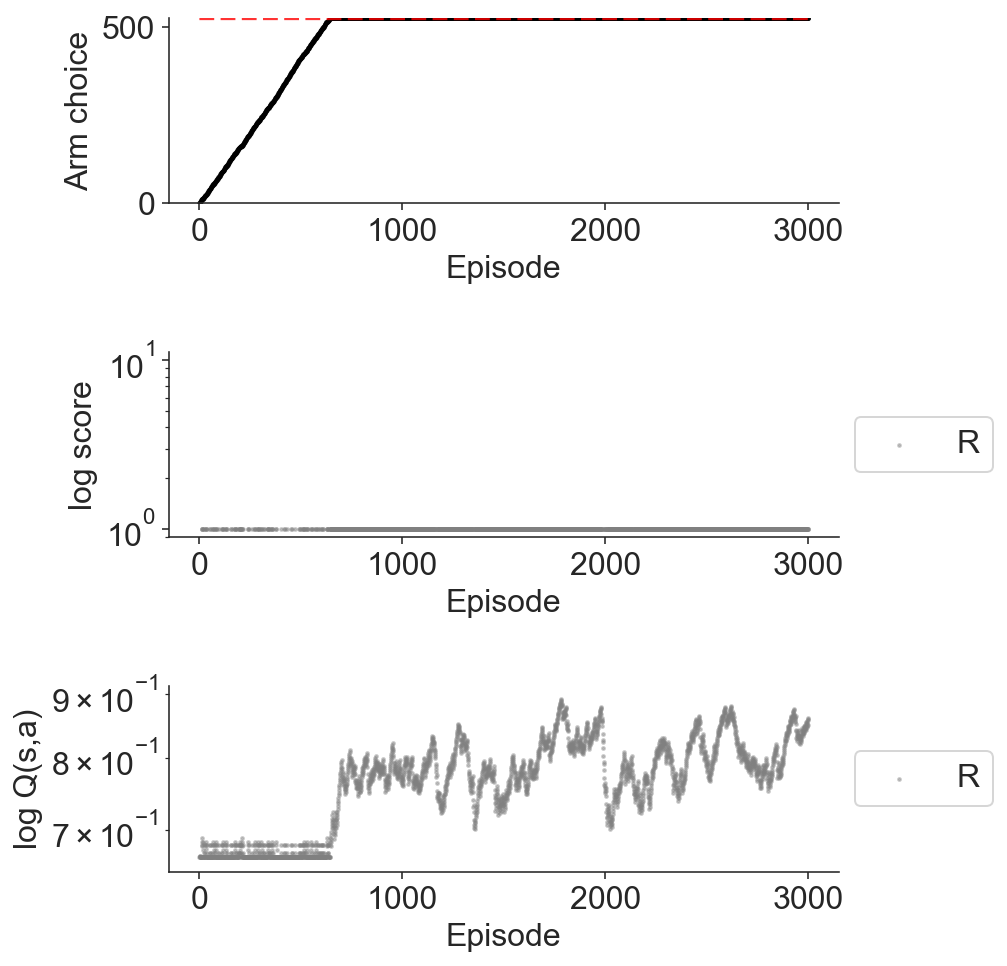

In [52]:
# Plot run
episodes = result["episodes"]
actions =result["actions"]
scores_R = result["scores_R"]
values_R = result["values_R"]

# Get some data from the gym...
env = gym.make(env_name)
best = env.env.best
print(f"Best arm: {best}, last arm: {actions[-1]}")

# Init plot
fig = plt.figure(figsize=(6, 14))
grid = plt.GridSpec(5, 1, wspace=0.3, hspace=0.8)

# Do plots:
# Arm
plt.subplot(grid[0, 0])
plt.scatter(episodes, actions, color="black", alpha=.5, s=2, label="Bandit")
plt.plot(episodes, np.repeat(best, np.max(episodes)+1), 
         color="red", alpha=0.8, ls='--', linewidth=2)
plt.ylim(-.1, np.max(actions)+1.1)
plt.ylabel("Arm choice")
plt.xlabel("Episode")

# score
plt.subplot(grid[1, 0])
plt.scatter(episodes, scores_R, color="grey", alpha=0.4, s=2, label="R")
plt.ylabel("log score")
plt.xlabel("Episode")
plt.semilogy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()

# Q
plt.subplot(grid[2, 0])
plt.scatter(episodes, values_R, color="grey", alpha=0.4, s=2, label="R")
plt.ylabel("log Q(s,a)")
plt.xlabel("Episode")
plt.semilogy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()

# -
plt.savefig("figures/epsilon_bandit.pdf",  bbox_inches='tight')
plt.savefig("figures/epsilon_bandit.eps",  bbox_inches='tight')

## Sensitivity

to parameter choices

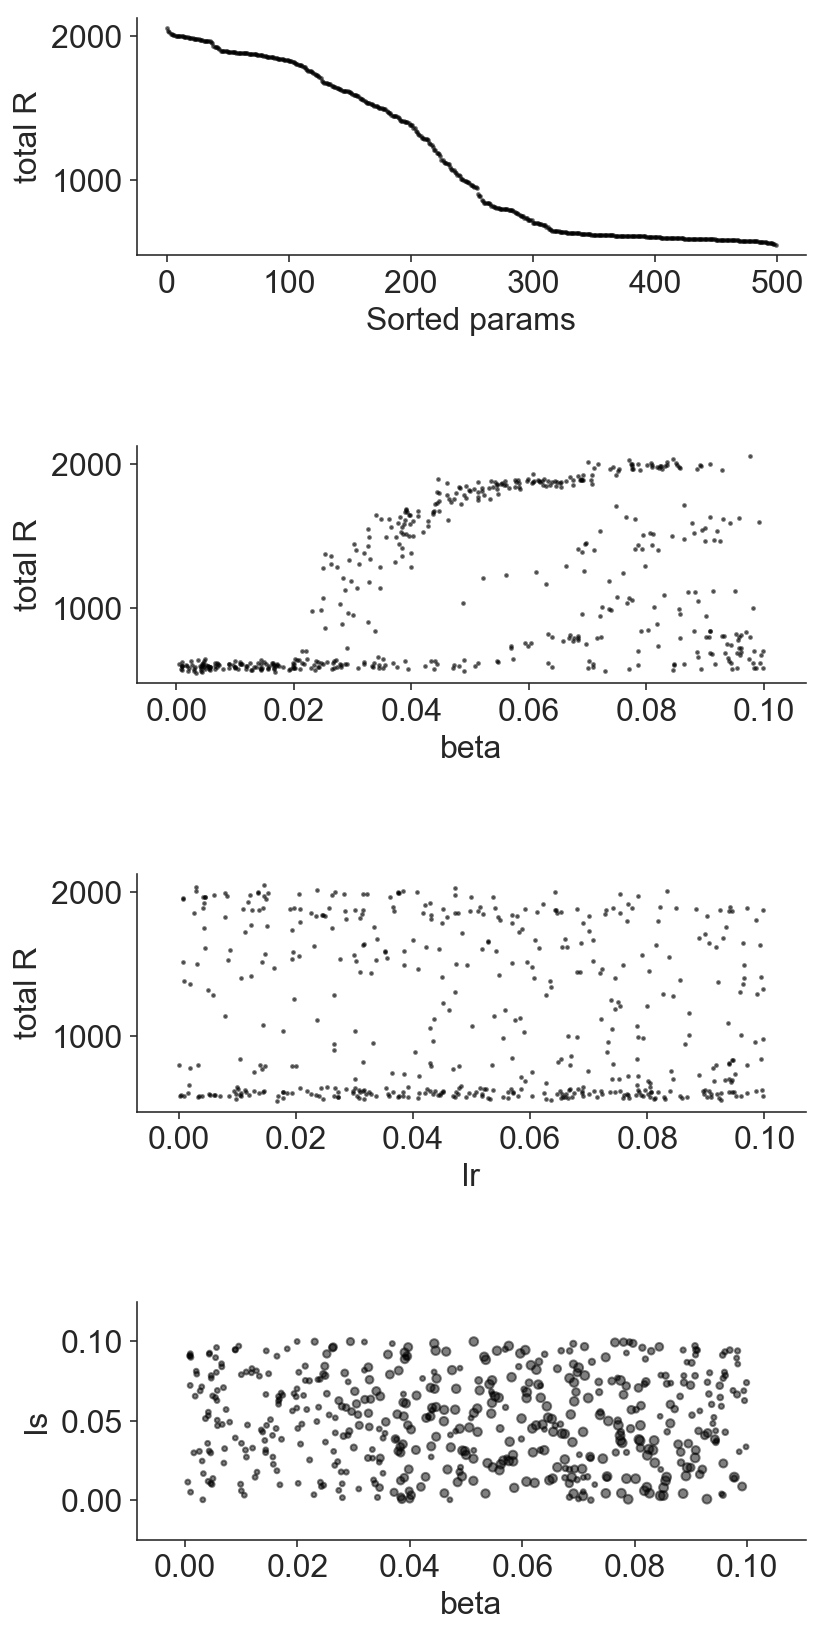

In [68]:
total_Rs = [] 
betas = []
lrs = []
trials = list(sorted_params.keys())
for t in trials:
    total_Rs.append(sorted_params[t]['total_R'])
    betas.append(sorted_params[t]['beta'])
    lrs.append(sorted_params[t]['lr'])
    
# Init plot
fig = plt.figure(figsize=(6, 14))
grid = plt.GridSpec(4, 1, wspace=0.3, hspace=0.8)

# Do plots:
# Arm
plt.subplot(grid[0, 0])
plt.scatter(trials, total_Rs, color="black", alpha=.5, s=2, label="total R")
plt.xlabel("Sorted params")
plt.ylabel("total R")
_ = sns.despine()

plt.subplot(grid[1, 0])
plt.scatter(betas, total_Rs, color="black", alpha=.5, s=2, label="total R")
plt.xlabel("beta")
plt.ylabel("total R")
_ = sns.despine()

plt.subplot(grid[2, 0])
plt.scatter(lrs, total_Rs, color="black", alpha=.5, s=2, label="total R")
plt.xlabel("lr")
plt.ylabel("total R")
_ = sns.despine()

plt.subplot(grid[3, 0])
plt.scatter(betas, lrs, color="black", alpha=.5, s=np.asarray(total_Rs)/1e2, label="total R")
plt.xlabel("beta")
plt.ylabel("ls")
_ = sns.despine()

## Off task

Smaller of same type

In [56]:
env_name = 'BanditOneHot10-v0'

# Run w/ best params
result = beta_bandit(
    env_name=env_name,
    num_episodes=3000, 
    lr=best_params["lr"], 
    beta=best_params["beta"],
    seed_value=19,
    save="exp25_best_model.pkl"
)

Best arm: 7, last arm: 7


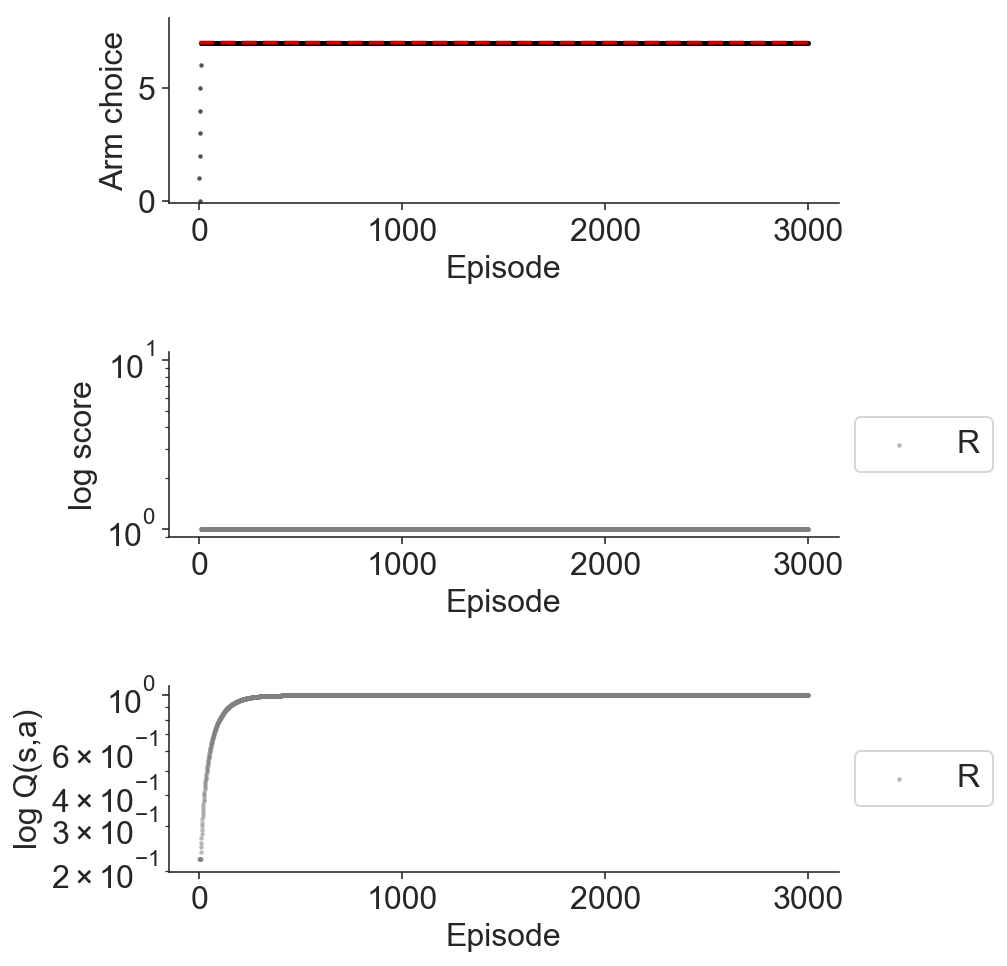

In [57]:
# Plot run
episodes = result["episodes"]
actions =result["actions"]
scores_R = result["scores_R"]
values_R = result["values_R"]

# Get some data from the gym...
env = gym.make(env_name)
best = env.env.best
print(f"Best arm: {best}, last arm: {actions[-1]}")

# Init plot
fig = plt.figure(figsize=(6, 14))
grid = plt.GridSpec(5, 1, wspace=0.3, hspace=0.8)

# Do plots:
# Arm
plt.subplot(grid[0, 0])
plt.scatter(episodes, actions, color="black", alpha=.5, s=2, label="Bandit")
plt.plot(episodes, np.repeat(best, np.max(episodes)+1), 
         color="red", alpha=0.8, ls='--', linewidth=2)
plt.ylim(-.1, np.max(actions)+1.1)
plt.ylabel("Arm choice")
plt.xlabel("Episode")

# score
plt.subplot(grid[1, 0])
plt.scatter(episodes, scores_R, color="grey", alpha=0.4, s=2, label="R")
plt.ylabel("log score")
plt.xlabel("Episode")
plt.semilogy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()

# Q
plt.subplot(grid[2, 0])
plt.scatter(episodes, values_R, color="grey", alpha=0.4, s=2, label="R")
plt.ylabel("log Q(s,a)")
plt.xlabel("Episode")
plt.semilogy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()

# -
plt.savefig("figures/epsilon_bandit.pdf",  bbox_inches='tight')
plt.savefig("figures/epsilon_bandit.eps",  bbox_inches='tight')

## Sensitivity off task

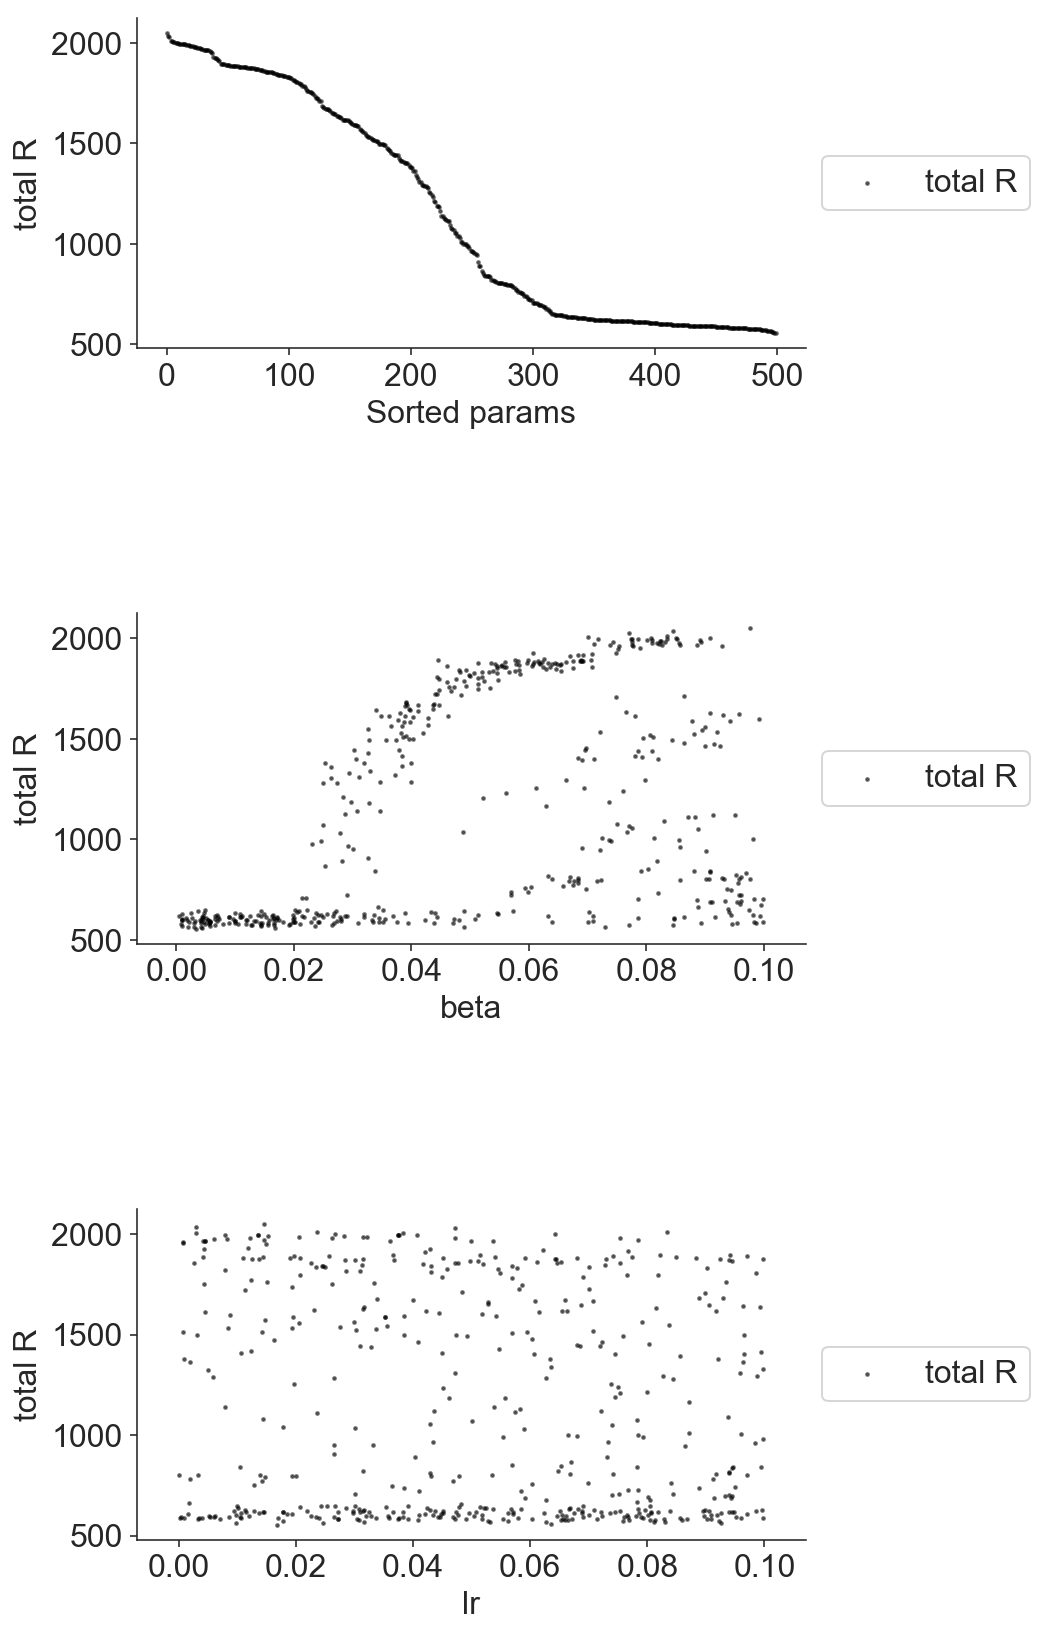

In [58]:
total_Rs = [] 
betas = []
lrs = []
trials = list(sorted_params.keys())
for t in trials:
    total_Rs.append(sorted_params[t]['total_R'])
    betas.append(sorted_params[t]['beta'])
    lrs.append(sorted_params[t]['lr'])
    
# Init plot
fig = plt.figure(figsize=(6, 14))
grid = plt.GridSpec(4, 1, wspace=0.3, hspace=0.8)

# Do plots:
# Arm
plt.subplot(grid[0, 0])
plt.scatter(trials, total_Rs, color="black", alpha=.5, s=2, label="total R")
plt.xlabel("Sorted params")
plt.ylabel("total R")
_ = sns.despine()

plt.subplot(grid[1, 0])
plt.scatter(betas, total_Rs, color="black", alpha=.5, s=2, label="total R")
plt.xlabel("beta")
plt.ylabel("total R")
_ = sns.despine()

plt.subplot(grid[2, 0])
plt.scatter(lrs, total_Rs, color="black", alpha=.5, s=2, label="total R")
plt.xlabel("lr")
plt.ylabel("total R")
_ = sns.despine()

plt.subplot(grid[3, 0])
plt.scatter(betas, lrs, color="black", alpha=.5, s=np.asarray(total_Rs)/1e2, label="total R")
plt.xlabel("beta")
plt.ylabel("ls")
_ = sns.despine()